# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> Wesley Gabriel Albano da Silva </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

In [2]:
#Abrir o arquivo
dados = pd.read_csv('earthquake.csv')
#listar colunas
print(list(dados))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [3]:
dados.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [4]:
hemisferio = []
for i in dados['Latitude']:
    if i > 0:
        hemisferio.append('Norte')
    else:
        hemisferio.append('Sul')
dados['hemisferio'] = hemisferio

dados.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,hemisferio
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte


## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000261632C50F0>]], dtype=object)

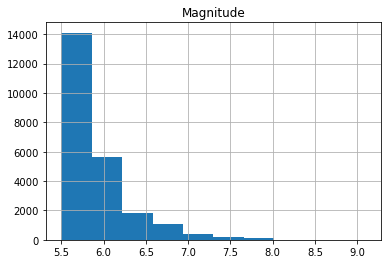

In [5]:
dados.hist(column = 'Magnitude')

 A maioria dos terremotos tem magnitude entre 5 e 6, sendo extremamente raro, em perspectiva, terremotos de magnitude maior do que 6.5

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de loc e scale. Interprete loc e scale no caso da exponencial. Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

5.49999999967 0.382548648851


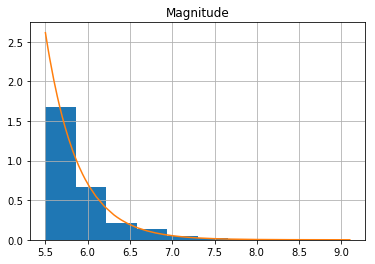

In [6]:
#Loc é a média e scale é o lambda(desvio padrão)

mu,sigma = expon.fit(dados['Magnitude'])
print(mu,sigma)
dados.hist(column = 'Magnitude', normed = True)
plt.plot(sorted(dados['Magnitude']),expon.pdf(sorted(dados['Magnitude']), loc = mu, scale = sigma))


Loc é o lugar 

Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [8]:
tab_type_hemisfere = pd.crosstab(dados.hemisferio,dados.Type,normalize=True)
tab_type_hemisfere

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst
hemisferio,,,,
Norte,0.447121,0.000085,0.006279,0.000000
Sul,0.545191,0.000085,0.001196,0.000043


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [33]:
#Assumindo que já aconteceu um terremoto, qual a chance de ele ter sido no norte
print(tab_type_hemisfere['Earthquake'][0]*100/(tab_type_hemisfere['Earthquake'][0]+tab_type_hemisfere['Earthquake'][1]),'%') #dividir pela probabilidade de terremoto

45.0585399449 %


Explique o seu raciocínio:

Se, de todos os tremores registrados na base de dados, 44.7121134461% foram no hemisfério norte, então a probabilidade de se ocorrer um terremoto no hemisfério norte é de 44.7121134461%

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [34]:
Prob = tab_type_hemisfere['Nuclear Explosion'][0]/(dados[(dados['hemisferio'] == 'Norte')].count()[0]/dados.count()[0])
print(Prob*100,'%')

1.38457191297 %


## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

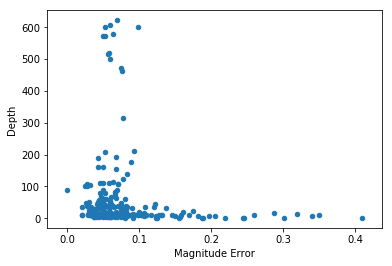

In [11]:
dados.plot.scatter('Magnitude Error','Depth')

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [12]:
media_x = dados['Magnitude'].mean()

media_y = dados['Depth'].mean()


axb = 0
a2 = 0
b2 = 0
i=0
while i < len(dados.Magnitude):
    a = dados['Magnitude'][i] - media_x
    b = dados['Depth'][i]-media_y
    axb += a*b
    a2 += a**2
    b2 += b**2
    i+=1

coef = axb/np.sqrt(a2*b2)


print(coef)    

0.0234573124921


Explique o que significa o valor da correlação calculada acima? 

Um coeficiente tão próximo de zero indica que não há correlação das variáveis analisadas (magnitude e profundidade)

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

In [13]:
print(dados['Latitude'].describe(),'\n\n')


count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64 




Pode-se dizer que há poucas medições nas latitudes mais baixas, próximas à antártica, já que a latitude mínima em que foi registrada um evento é de -77°. 
    Porém, ao olhar a mediana, percebe-se que há mais registros de latitudes baixas ( x < 0 ) por ela ser, também, menor que zero. 

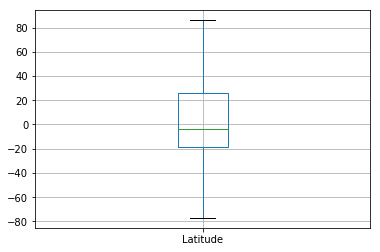

In [57]:
dados['Latitude'].plot(kind='box')
plt.grid(2)

count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64 




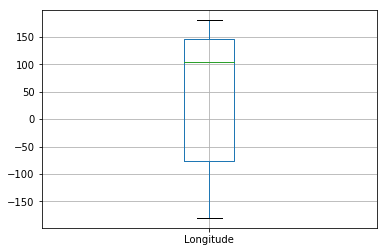

In [74]:
print(dados['Longitude'].describe(),'\n\n')
dados['Longitude'].plot(kind='box')
plt.grid(2)

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [69]:
selecao = dados[(dados['Magnitude Type'] == 'MB') & (dados['Type']== 'Nuclear Explosion')]
selecao

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,hemisferio
2797,07/23/1973,01:22:58,49.986,78.853,Nuclear Explosion,0.0,NaN,NaN,6.3,MB,...,NaN,NaN,NaN,NaN,USP00002TP,US,US,US,Reviewed,Norte
2859,09/12/1973,06:59:54,73.302,55.161,Nuclear Explosion,0.0,NaN,NaN,6.8,MB,...,NaN,NaN,NaN,NaN,USP00003DP,US,US,US,Reviewed,Norte
2876,09/27/1973,06:59:58,70.756,53.872,Nuclear Explosion,0.0,NaN,NaN,6.0,MB,...,NaN,NaN,NaN,NaN,USP00003K1,US,US,US,Reviewed,Norte
2897,10/27/1973,06:59:57,70.779,54.177,Nuclear Explosion,0.0,NaN,NaN,6.9,MB,...,NaN,NaN,NaN,NaN,USP00003YA,US,US,US,Reviewed,Norte
2951,12/14/1973,07:46:57,50.036,79.011,Nuclear Explosion,0.0,NaN,NaN,6.0,MB,...,NaN,NaN,NaN,NaN,USP00004HT,US,US,US,Reviewed,Norte
3126,05/31/1974,03:26:57,49.952,78.844,Nuclear Explosion,0.0,NaN,NaN,5.9,MB,...,NaN,NaN,NaN,NaN,USP00006K2,US,US,US,Reviewed,Norte
3205,08/14/1974,14:59:58,68.913,75.899,Nuclear Explosion,0.0,NaN,NaN,5.5,MB,...,NaN,NaN,NaN,NaN,USP00007MB,US,US,US,Reviewed,Norte
3218,08/29/1974,09:59:55,73.366,55.094,Nuclear Explosion,0.0,NaN,NaN,6.4,MB,...,NaN,NaN,NaN,NaN,USP00007UG,US,US,US,Reviewed,Norte
3269,10/16/1974,06:32:57,49.972,78.968,Nuclear Explosion,0.0,NaN,NaN,5.5,MB,...,NaN,NaN,NaN,NaN,USP00008EC,US,US,US,Reviewed,Norte
3286,11/02/1974,04:59:57,70.817,54.063,Nuclear Explosion,0.0,NaN,NaN,6.7,MB,...,NaN,NaN,NaN,NaN,USP00008N6,US,US,US,Reviewed,Norte


In [72]:
selecao['hemisferio'].value_counts(True)

Norte    0.828221
Sul      0.171779
Name: hemisferio, dtype: float64